1) 크롤링(Crawling), 스크래핑(Scarping)

2) HTTP(Hyper Text Transfer Protocol): 인터넷에서 데이터를 주고 받을 수 있는 프로토콜

3) HTML: 웹에 사용되는 표준 Markup언어

4) 파싱(Parsing) : 어떤 페이지(문서, html)에서 원하는 데이터를 특정 패턴이나 순서로 추출하여 정보 가공



<Strong>
Hypertext Markup <U>Language </U> (HTML)
</Strong>

<h1>Test</h1>
<h1>This is heading 1</h1>
<h2>This is heading 2</h2>
<h3>This is heading</h3>
<h4>This is heading</h4>
<h5>This is heading</h5>
<h6>This is heading</h6>

# This is headin1

5) HTML 태그?: 태그 내부에 값을 넣을 수 있을 뿐만 아니라, 태그마다 속성을 부여할 수 있음. 태그의 속성은 <태그 속성="값"> 의 형태로 사용, 태그마다 여러 속성을 부여 할 수도 있음.

6)Xpath: XML 문서의 특정 요소나 속성에 접근하기 위한 경로를 지정하는 언어.

/html/body/div/span/a...

7) requests - 웹페이지 읽기 / urllib, urllib2 을 사용하거나 requests 를 사용
-HTTP GET, POST, PUT, DELETE 등을 사용할 수 있음
-데이타 인코딩 기능을 제공: 데이타를 Dictionary로 만들어 GET, POST 등에서 사용


In [ ]:
!pip install requests

In [ ]:
import requests
res = requests.get('http://www.naver.com')
print('결과: ', res.status_code) #200은 정상적인 접속

결과:  200


In [ ]:
import requests
res = requests.get('https://www.naver.com/abcdefg')
print('결과 : ', res.status_code) #400수준 코드는 접속 불가

결과 :  404


In [ ]:
import requests
res = requests.get('http://naver.com')
print('결과: ', res.status_code) 

if res.status_code == requests.codes.ok:
  print('ok')
else : 
  print("error code:",res.status_code)

결과:  200
ok


In [ ]:
import requests
res = requests.get('http://naver.com')
print('결과 : ', res.status_code) 

res.raise_for_status() #res가 정상이 아닌 경우 오류
print('crawling start')

결과 :  200
crawling start


'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버
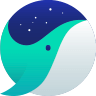
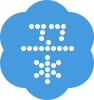

In [ ]:
import requests
res = requests.get('http://naver.com')
res.raise_for_status() 

res.text

In [ ]:
import requests
res = requests.get('http://google.com')
res.raise_for_status() 

with open('crawl1.html','w', encoding = 'utf-8') as f:
  f.write(res.text)


8) beautifulsoup : HTML 파싱을 위한 라이브러리

In [ ]:
!pip install beautifulsoup4 #Parsing을 위한 라이브러리
!pip install lxml #XML parser로 이용

In [ ]:
import requests
from bs4 import BeautifulSoup

url = 'https://comic.naver.com/webtoon/weekday.nhn'
res = requests.get(url)
res.raise_for_status() 

soup = BeautifulSoup(res.text, "lxml")
soup


<!DOCTYPE html>
<html lang="ko">
<head>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
<title>네이버 만화 &gt; 요일별  웹툰 &gt; 전체웹툰</title>
<meta content="네이버 웹툰" property="og:title"/>
<meta content="https://ssl.pstatic.net/static/comic/images/og_tag_v2.png" property="og:image"/>
<meta content="매일매일 새로운 재미, 네이버 웹툰." property="og:description"/>
<meta content="https://comic.naver.com/webtoon/weekday" property="og:url"/>
<meta content="article" property="og:type"/>
<meta content="네이버 웹툰" property="og:article:author"/>
<meta content="https://comic.naver.com" property="og:article:author:url"/>
<link href="https://ssl.pstatic.net/static/comic/favicon/webtoon_favicon_32x32.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/css/comic/comic_20220211153122.css" rel="stylesheet" style="text/css"/>
<!-- comicWeekdayJsFile -->
<script charset="utf-8" src="/aggregate/javascript/release/comic_weekday_20220211153122

In [ ]:
soup.title

<title>네이버 만화 &gt; 요일별  웹툰 &gt; 전체웹툰</title>

In [ ]:
soup.title.get_text() #해당 태그에 대한 텍스트값

'네이버 만화 > 요일별  웹툰 > 전체웹툰'

In [ ]:
soup.a #파싱 결과 중 처음 나오는 a태그 출력

<a href="#menu" onclick="document.getElementById('menu').tabIndex=-1;document.getElementById('menu').focus();return false;"><span>메인 메뉴로 바로가기</span></a>

In [ ]:
soup.a.attrs # a태그의 속성 정보

{'href': '#menu',
 'onclick': "document.getElementById('menu').tabIndex=-1;document.getElementById('menu').focus();return false;"}

In [ ]:
soup.a['href']#a태그 속성 정보 중 href키값의 값 출력

'#menu'

In [ ]:
print(soup.find('a',attrs={'class':'Nbtn_upload'})) #클래스 명칭을 갖는 a태그

<a class="Nbtn_upload" href="/mypage/myActivity" onclick="nclk_v2(event,'olk.upload');">웹툰 올리기</a>


In [ ]:
print(soup.find('li', attrs={'class':'rank01'}))  #해당 클래스의 li 태그 출력

<li class="rank01">
<a href="/webtoon/detail?titleId=758037&amp;no=68" onclick="nclk_v2(event,'rnk*p.cont','758037','1')" title="참교육-68화">참교육-68화</a>
<span class="rankBox">
<img alt="변동없음" height="10" src="https://ssl.pstatic.net/static/comic/images/migration/common/arrow_no.gif" title="변동없음" width="7"/> 0
						
					
				</span>
</li>


In [ ]:
rank1 = soup.find('li', attrs = {'class':'rank01'}) #파싱 결과를 할당
rank1.a

<a href="/webtoon/detail?titleId=758037&amp;no=68" onclick="nclk_v2(event,'rnk*p.cont','758037','1')" title="참교육-68화">참교육-68화</a>

In [ ]:
rank1.a.get_text()  #a태그의 텍스트값

'참교육-68화'

In [ ]:
print(rank1.next_sibling.next_sibling) #다음 값 출력

<li class="rank02">
<a href="/webtoon/detail?titleId=783052&amp;no=18" onclick="nclk_v2(event,'rnk*p.cont','783052','2')" title="퀘스트지상주의-18화 챌린저 카드?!">퀘스트지상주의-18화 챌린저 카드?!</a>
<span class="rankBox">
<img alt="변동없음" height="10" src="https://ssl.pstatic.net/static/comic/images/migration/common/arrow_no.gif" title="변동없음" width="7"/> 0
						
					
				</span>
</li>


In [ ]:
rank2 = rank1.next_sibling.next_sibling
rank3 = rank2.next_sibling.next_sibling

print(rank2.a.get_text())
print(rank3.a.get_text())

퀘스트지상주의-18화 챌린저 카드?!
신의 탑-3부 109화


In [ ]:
rank2 = rank3.previous_sibling.previous_sibling #이전으로 복귀
print(rank2.a.get_text())

퀘스트지상주의-18화 챌린저 카드?!


In [ ]:
rank1.parent

<ol class="asideBoxRank" id="realTimeRankFavorite">
<li class="rank01">
<a href="/webtoon/detail?titleId=758037&amp;no=68" onclick="nclk_v2(event,'rnk*p.cont','758037','1')" title="참교육-68화">참교육-68화</a>
<span class="rankBox">
<img alt="변동없음" height="10" src="https://ssl.pstatic.net/static/comic/images/migration/common/arrow_no.gif" title="변동없음" width="7"/> 0
						
					
				</span>
</li>
<li class="rank02">
<a href="/webtoon/detail?titleId=783052&amp;no=18" onclick="nclk_v2(event,'rnk*p.cont','783052','2')" title="퀘스트지상주의-18화 챌린저 카드?!">퀘스트지상주의-18화 챌린저 카드?!</a>
<span class="rankBox">
<img alt="변동없음" height="10" src="https://ssl.pstatic.net/static/comic/images/migration/common/arrow_no.gif" title="변동없음" width="7"/> 0
						
					
				</span>
</li>
<li class="rank03">
<a href="/webtoon/detail?titleId=183559&amp;no=528" onclick="nclk_v2(event,'rnk*p.cont','183559','3')" title="신의 탑-3부 109화">신의 탑-3부 109화</a>
<span class="rankBox">
<img alt="변동없음" height="10" src="https://ssl.pstatic.net/sta

In [ ]:
rank2 = rank1.find_next_sibling('li') #다음 element 중 li 태그의 텍스트값
print(rank2.a.get_text())

퀘스트지상주의-18화 챌린저 카드?!


In [ ]:
rank3 = rank2.find_next_sibling('li')
print(rank3.a.get_text())

신의 탑-3부 109화


In [ ]:
rank2 = rank3.find_previous_sibling('li')
print(rank3.a.get_text())

신의 탑-3부 109화


In [ ]:
rank1.find_next_siblings('li')  #sibling 중 li태그를 갖는 것 출력

[<li class="rank02">
 <a href="/webtoon/detail?titleId=783052&amp;no=18" onclick="nclk_v2(event,'rnk*p.cont','783052','2')" title="퀘스트지상주의-18화 챌린저 카드?!">퀘스트지상주의-18화 챌린저 카드?!</a>
 <span class="rankBox">
 <img alt="변동없음" height="10" src="https://ssl.pstatic.net/static/comic/images/migration/common/arrow_no.gif" title="변동없음" width="7"/> 0
 						
 					
 				</span>
 </li>, <li class="rank03">
 <a href="/webtoon/detail?titleId=183559&amp;no=528" onclick="nclk_v2(event,'rnk*p.cont','183559','3')" title="신의 탑-3부 109화">신의 탑-3부 109화</a>
 <span class="rankBox">
 <img alt="변동없음" height="10" src="https://ssl.pstatic.net/static/comic/images/migration/common/arrow_no.gif" title="변동없음" width="7"/> 0
 						
 					
 				</span>
 </li>, <li class="rank04">
 <a href="/webtoon/detail?titleId=648419&amp;no=322" onclick="nclk_v2(event,'rnk*p.cont','648419','4')" title="뷰티풀 군바리-316화_2008년 2월">뷰티풀 군바리-316화_2008년 2월</a>
 <span class="rankBox">
 <img alt="변동없음" height="10" src="https://ssl.pstatic.net/static

In [ ]:
#<a href="/webtoon/detail?titleId=752414&amp;no=65" onclick="nclk_v2(event,'rnk*p.cont','752414','10')" title="리턴 투 플레이어-65화. 추모하는 자">리턴 투 플레이어-65화. 추모하는 자</a>

webtoon = soup.find('a',text ='리턴 투 플레이어-65화. 추모하는 자')
webtoon

<a href="/webtoon/detail?titleId=752414&amp;no=65" onclick="nclk_v2(event,'rnk*p.cont','752414','10')" title="리턴 투 플레이어-65화. 추모하는 자">리턴 투 플레이어-65화. 추모하는 자</a>

In [ ]:
import requests
from bs4 import BeautifulSoup

url = 'https://comic.naver.com/webtoon/weekday.nhn'
res = requests.get(url)
res.raise_for_status() 

soup = BeautifulSoup(res.text, "lxml")


cartoons = soup.find_all('a',attrs = {'class':'title'})#네이버 웹툰 전체 목록  중, title class의 a 태그

for catoon in cartoons:
  print(catoon.get_text())

쇼미더럭키짱!
참교육
신의 탑
2022 서브병에 빠지다!
퀘스트지상주의
소녀의 세계
장씨세가 호위무사
백수세끼
팔이피플
앵무살수
잔불의 기사
만렙돌파
리턴 투 플레이어
별을 쫓는 소년들
요리GO
똑 닮은 딸
더블클릭
히어로메이커
칼가는 소녀
물어보는 사이
결혼생활 그림일기
평범한 8반
뷰티풀 군바리
황제와의 하룻밤
디나운스
찌질하지만 로맨스는 하고 싶어
꼬리잡기
신군
나만의 고막남친
아는 여자애
꿈의 기업
싸이코 리벤지
아, 쫌 참으세요 영주님!
이별 후 사내 결혼
오빠집이 비어서
제왕: 빛과 그림자
이제야 연애
장난감
와이키키 뱀파이어
오로지 오로라
또다시, 계약 부부
말박왕
바퀴
레지나레나 - 용서받지 못한 그대에게
야생천사 보호구역
원작은 완결난 지 한참 됐습니다만
최후의 금빛아이
원하는 건 너 하나
이중첩자
악녀 18세 공략기
왕따협상
달로 만든 아이
모스크바의 여명
홍천기
중독연구소
사랑의 헌옷수거함
기사님을 지켜줘
그림자 신부
마지막 지수
개밥 먹는 남자
모락모락 왕세자님
바로 보지 않는
트리거
역주행!
결백한 사람은 없다
사막에 핀 달
남주서치
보살님이 캐리해!
헬로맨스
슈퍼스타 천대리
쇼미더럭키짱!
여신강림
김부장
2022 서브병에 빠지다!
1을 줄게
한림체육관
멸망 이후의 세계
내가 키운 S급들
사신소년
중증외상센터 : 골든 아워
용사가 돌아왔다
하루만 네가 되고 싶어
신도림
삼국지톡
니나의 마법서랍
엽총소년
랜덤채팅의 그녀!
헬58
하북팽가 막내아들
집이 없어
원주민 공포만화
소극적 인간
윌유메리미
덴큐
한입만!
위아더좀비
몬스터
늑대처럼 홀로
애옹식당
하우스키퍼
빌런투킬
택배 왔습니다
견우와 선녀
100
짝사랑의 마침표
올가미
미물
용왕님의 셰프가 되었습니다
은주의 방 2~3부
빅맨
플레이, 플리
또 다른 사랑
대공님, 실수였어요!
이상형은 아닙니다
나타나주세요!
정년이
제로게임
숲속의 담
연우의 순정
오파츠
나의 플랏메이트
열녀박씨 계약결혼뎐
미신
시벨롬 리스트
그녀석 정복기
대신 심부름을 해다오
나는 어디에나 있다
그 남주와 이별하는 방

In [ ]:
import requests
from bs4 import BeautifulSoup

url = 'https://comic.naver.com/webtoon/list?titleId=675554'
res = requests.get(url)
res.raise_for_status() # 문제있는지 확인

soup = BeautifulSoup(res.text, "lxml")

cartoons = soup.find_all('td',attrs = {'class':'title'})
title = cartoons[0].a.get_text()
link = cartoons[0].a['href']
print(title)
print(link)
print('https://comic.naver.com'+link)


후기 + 10년 후 가우스
/webtoon/detail?titleId=675554&no=911&weekday=mon
https://comic.naver.com/webtoon/detail?titleId=675554&no=911&weekday=mon


In [ ]:
import requests
from bs4 import BeautifulSoup

url = 'https://comic.naver.com/webtoon/list?titleId=675554'
res = requests.get(url)
res.raise_for_status() 

soup = BeautifulSoup(res.text, "lxml")

cartoons = soup.find_all('td',attrs = {'class':'title'})
for cartoon in cartoons:
  title = cartoon.a.get_text()
  link = 'https://comic.naver.com'+cartoon.a['href']
  print(title,link)


후기 + 10년 후 가우스 https://comic.naver.com/webtoon/detail?titleId=675554&no=911&weekday=mon
시즌4 430화 내일 봐요 https://comic.naver.com/webtoon/detail?titleId=675554&no=910&weekday=mon
시즌4 429화 잠행 https://comic.naver.com/webtoon/detail?titleId=675554&no=909&weekday=mon
시즌4 428화 추억 https://comic.naver.com/webtoon/detail?titleId=675554&no=908&weekday=mon
시즌4 427화 섬세한사람 https://comic.naver.com/webtoon/detail?titleId=675554&no=907&weekday=mon
시즌4 426화 적응 https://comic.naver.com/webtoon/detail?titleId=675554&no=906&weekday=mon
시즌4 425화 대견 https://comic.naver.com/webtoon/detail?titleId=675554&no=905&weekday=mon
시즌4 424화 초빙강사 https://comic.naver.com/webtoon/detail?titleId=675554&no=904&weekday=mon
시즌4 423화 추억의 물건 https://comic.naver.com/webtoon/detail?titleId=675554&no=903&weekday=mon
시즌4 422화 아니요 https://comic.naver.com/webtoon/detail?titleId=675554&no=902&weekday=mon


In [ ]:
import requests
from bs4 import BeautifulSoup

url = 'https://comic.naver.com/webtoon/list?titleId=675554'
res = requests.get(url)
res.raise_for_status() 
soup = BeautifulSoup(res.text, "lxml")

#만화평점
total_rates = 0
cartoons = soup.find_all('div',attrs = {'class':'rating_type'})
for cartoon in cartoons:
  rate = cartoon.find('strong').get_text()
  print(rate)
  total_rates +=float(rate)

total_rates


9.98
9.98
9.97
9.97
9.97
9.98
9.97
9.97
9.97
9.97


99.72999999999999

10) 이미지 URL 및 파일 수집

In [ ]:
import requests
from bs4 import BeautifulSoup

res = requests.get('https://search.daum.net/search?w=tot&DA=YZR&t__nil_searchbox=btn&sug=&sugo=&sq=&o=&q=2021%EB%85%84%EC%98%81%ED%99%94%EC%88%9C%EC%9C%84')
res.raise_for_status()
soup = BeautifulSoup(res.text, 'lxml')

images = soup.find_all('img', attrs = {'class':'thumb_img'})

for idx, image in enumerate(images):
  print(image['src'])
  image_url = image['src']
  if image_url.startswith('//'):
    image_url = 'http'+ image_url
  
  print(image_url)
  image_res = requests.get(image_url)
  image_res.raise_for_status()

  with open('moive{}.jpg'.format(idx+1), 'wb')as f:
    f.write(image_res.content)
  if idx>=4 :#상위 5개 이미지 다운로드
    break

https://search1.kakaocdn.net/thumb/R232x328.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2F4fc5880afdb5b7c60161f34184e1f466814fec2d
https://search1.kakaocdn.net/thumb/R232x328.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2F4fc5880afdb5b7c60161f34184e1f466814fec2d
https://search1.kakaocdn.net/thumb/R232x328.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2F232a8d6e902c63036bbe2ae327d57e82585a639f
https://search1.kakaocdn.net/thumb/R232x328.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2F232a8d6e902c63036bbe2ae327d57e82585a639f
https://search1.kakaocdn.net/thumb/R232x328.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2Ff2d3ee4afbc78b44e34534037e17f7f382e1b65c
https://search1.kakaocdn.net/thumb/R232x328.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2Ff2d3ee4afbc78b44e34534037e17f7f382e1b65c
https://search1.kakaocdn.net/thumb/R232x328.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2Ff39274b0acd76f7c66f0a5fb9e5b7222ed37b373
https://search1.kakaocdn.net/thumb/R232x328.q85/?fname=

In [ ]:
import requests
from bs4 import BeautifulSoup

for year in range(2019,2021):
  res = requests.get('https://search.daum.net/search?w=tot&DA=YZR&t__nil_searchbox=btn&sug=&sugo=&sq=&o=&q=2021%EB%85%84%EC%98%81%ED%99%94%EC%88%9C%EC%9C%84')
  res.raise_for_status()
  soup = BeautifulSoup(res.text, 'lxml')

  images = soup.find_all('img', attrs = {'class':'thumb_img'})

  for idx, image in enumerate(images):
    print(image['src'])
    image_url = image['src']
    if image_url.startswith('//'):
      image_url = 'http'+ image_url
    
    print(image_url)
    image_res = requests.get(image_url)
    image_res.raise_for_status()

    with open('moive_{}_{}.jpg'.format(year,idx+1), 'wb')as f:
      f.write(image_res.content)
    if idx>=4 :
      break

https://search1.kakaocdn.net/thumb/R232x328.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2F4fc5880afdb5b7c60161f34184e1f466814fec2d
https://search1.kakaocdn.net/thumb/R232x328.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2F4fc5880afdb5b7c60161f34184e1f466814fec2d
https://search1.kakaocdn.net/thumb/R232x328.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2F232a8d6e902c63036bbe2ae327d57e82585a639f
https://search1.kakaocdn.net/thumb/R232x328.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2F232a8d6e902c63036bbe2ae327d57e82585a639f
https://search1.kakaocdn.net/thumb/R232x328.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2Ff2d3ee4afbc78b44e34534037e17f7f382e1b65c
https://search1.kakaocdn.net/thumb/R232x328.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2Ff2d3ee4afbc78b44e34534037e17f7f382e1b65c
https://search1.kakaocdn.net/thumb/R232x328.q85/?fname=https%3A%2F%2Ft1.daumcdn.net%2Fmovie%2Ff39274b0acd76f7c66f0a5fb9e5b7222ed37b373
https://search1.kakaocdn.net/thumb/R232x328.q85/?fname=

11) 네이버 주가 정보

In [ ]:
import csv
import requests
from bs4 import BeautifulSoup

url = 'https://finance.naver.com/sise/sise_market_sum.nhn?sosok=0&page='

for page in range(1,2):
  res = requests.get(url + str(page))
  res.raise_for_status()
  soup = BeautifulSoup(res.text, 'lxml')


  data_rows = soup.find('table',attrs={'class':'type_2'}).find('tbody').find_all('tr')
  for row in data_rows:
    columns = row.find_all('td')
    data = [column.get_text().strip() for column in columns]
    print(data)


['']
['1', '삼성전자', '74,300', '700', '-0.93%', '100', '4,435,548', '5,969,783', '52.24', '10,038,318', '14.40', '9.99', '']
['2', 'LG에너지솔루션', '454,500', '0', '0.00%', '500', '1,063,530', '234,000', '3.82', '410,874', '308.14', 'N/A', '']
['3', 'SK하이닉스', '131,500', '1,500', '-1.13%', '5,000', '957,323', '728,002', '50.88', '3,099,655', '11.89', '9.53', '']
['4', '삼성전자우', '67,400', '500', '-0.74%', '100', '554,626', '822,887', '74.78', '656,338', '13.06', 'N/A', '']
['5', 'NAVER', '318,000', '6,500', '-2.00%', '100', '521,676', '164,049', '55.12', '546,707', '3.15', '15.22', '']
['']
['']
['']
['6', '삼성바이오로직스', '757,000', '3,000', '-0.39%', '2,500', '500,869', '66,165', '10.50', '38,085', '122.02', 'N/A', '']
['7', 'LG화학', '629,000', '11,000', '-1.72%', '5,000', '444,026', '70,592', '49.56', '180,586', '16.39', '2.93', '']
['8', '카카오', '91,400', '800', '+0.88%', '100', '407,609', '445,962', '28.07', '2,206,789', '35.98', '2.70', '']
['9', '현대차', '183,500', '0', '0.00%', '5,000', '392,081'

In [ ]:
import csv
import requests
from bs4 import BeautifulSoup

url = 'https://finance.naver.com/sise/sise_market_sum.nhn?sosok=0&page='

for page in range(1,2):
  res = requests.get(url + str(page))
  res.raise_for_status()
  soup = BeautifulSoup(res.text, 'lxml')


  data_rows = soup.find('table',attrs={'class':'type_2'}).find('tbody').find_all('tr')
  for row in data_rows:
    columns = row.find_all('td')
    if len(columns) <=1: #비어있는 라인 제외시키기
      continue
    data = [column.get_text().strip() for column in columns]
    print(data)


['1', '삼성전자', '74,300', '700', '-0.93%', '100', '4,435,548', '5,969,783', '52.24', '10,038,318', '14.40', '9.99', '']
['2', 'LG에너지솔루션', '454,500', '0', '0.00%', '500', '1,063,530', '234,000', '3.82', '410,874', '308.14', 'N/A', '']
['3', 'SK하이닉스', '131,500', '1,500', '-1.13%', '5,000', '957,323', '728,002', '50.88', '3,099,655', '11.89', '9.53', '']
['4', '삼성전자우', '67,400', '500', '-0.74%', '100', '554,626', '822,887', '74.78', '656,338', '13.06', 'N/A', '']
['5', 'NAVER', '318,000', '6,500', '-2.00%', '100', '521,676', '164,049', '55.12', '546,707', '3.15', '15.22', '']
['6', '삼성바이오로직스', '757,000', '3,000', '-0.39%', '2,500', '500,869', '66,165', '10.50', '38,085', '122.02', 'N/A', '']
['7', 'LG화학', '629,000', '11,000', '-1.72%', '5,000', '444,026', '70,592', '49.56', '180,586', '16.39', '2.93', '']
['8', '카카오', '91,400', '800', '+0.88%', '100', '407,609', '445,962', '28.07', '2,206,789', '35.98', '2.70', '']
['9', '현대차', '183,500', '0', '0.00%', '5,000', '392,081', '213,668', '27.39'

In [ ]:
import csv
import requests
from bs4 import BeautifulSoup

url = 'https://finance.naver.com/sise/sise_market_sum.nhn?sosok=0&page='

filename = 'kospi.csv'

f = open(filename, 'w', encoding = 'utf-8-sig', newline = '') #utf-8에서 인코딩 문제 발생 시, utf-8-signature로 인코딩
writer = csv.writer(f)

for page in range(1,2):
  res = requests.get(url + str(page))
  res.raise_for_status()
  soup = BeautifulSoup(res.text, 'lxml')

  data_rows = soup.find('table',attrs={'class':'type_2'}).find('tbody').find_all('tr')
  for row in data_rows:
    columns = row.find_all('td')
    if len(columns) <=1: #의미 없는 데이터는 skip
      continue
    data = [column.get_text().strip() for column in columns]
    # print(data)
    writer.writerow(data)


In [ ]:
import csv
import requests
from bs4 import BeautifulSoup

url = 'https://finance.naver.com/sise/sise_market_sum.nhn?sosok=0&page='

filename = 'kospi2.csv'

f = open(filename, 'w', encoding = 'utf-8-sig', newline = '')
writer = csv.writer(f)

title = 'N	종목명	현재가	전일비	등락률	액면가	시가총액	상장주식수	외국인비율	거래량	PER	ROE'.split('\t')
writer.writerow(title)
 
for page in range(1,5):
  res = requests.get(url + str(page))
  res.raise_for_status()
  soup = BeautifulSoup(res.text, 'lxml')


  data_rows = soup.find('table',attrs={'class':'type_2'}).find('tbody').find_all('tr')
  for row in data_rows:
    columns = row.find_all('td')
    if len(columns) <=1: #의미 없는 데이터는 skip
      continue
    data = [column.get_text().strip() for column in columns]
    # print(data)
    writer.writerow(data)



In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup



# 교보문고의 베스트셀러 웹페이지를 가져옵니다.
html = urlopen('http://www.kyobobook.co.kr/bestSellerNew/bestseller.laf')
bsObject = BeautifulSoup(html, "html.parser")


# 책의 상세 웹페이지 주소를 추출하여 리스트에 저장합니다.
book_page_urls = []
for cover in bsObject.find_all('div', {'class':'detail'}):
    link = cover.select('a')[0].get('href')
    book_page_urls.append(link)


# 메타 정보로부터 필요한 정보를 추출합니다.메타 정보에 없는 저자 정보만 따로 가져왔습니다.  
for index, book_page_url in enumerate(book_page_urls):
    html = urlopen(book_page_url)
    bsObject = BeautifulSoup(html, "html.parser")
    title = bsObject.find('meta', {'property':'og:title'}).get('content')
    author = bsObject.select('span.name a')[0].text
    image = bsObject.find('meta', {'property':'og:image'}).get('content')
    url = bsObject.find('meta', {'property':'og:url'}).get('content')
    Price = bsObject.find('meta', {'property': 'og:price'}).get('content')

    print(index+1, title, author, image, url, Price)

1 불편한 편의점(15만부 기념 윈터 에디션) - 교보문고 김호연 http://image.kyobobook.co.kr/images/book/xlarge/188/x9791161571188.jpg http://www.kyobobook.co.kr/product/detailViewKor.laf?mallGb=KOR&ejkGb=KOR&barcode=9791161571188 12600
2 윤석열 X파일 - 교보문고 열린공감TV http://image.kyobobook.co.kr/images/book/xlarge/618/x9791197747618.jpg http://www.kyobobook.co.kr/product/detailViewKor.laf?mallGb=KOR&ejkGb=KOR&barcode=9791197747618 14400
3 세븐 테크 - 교보문고 김미경 http://image.kyobobook.co.kr/images/book/xlarge/712/x9788901255712.jpg http://www.kyobobook.co.kr/product/detailViewKor.laf?mallGb=KOR&ejkGb=KOR&barcode=9788901255712 16200
4 그리움은 아무에게나 생기지 않습니다 - 교보문고 박근혜 http://image.kyobobook.co.kr/images/book/xlarge/984/x9791196661984.jpg http://www.kyobobook.co.kr/product/detailViewKor.laf?mallGb=KOR&ejkGb=KOR&barcode=9791196661984 13500
5 달러구트 꿈 백화점(100만부 기념 합본호: Gift Edition) - 교보문고 이미예 http://image.kyobobook.co.kr/images/book/xlarge/252/x9791165344252.jpg http://www.kyobobook.co.kr/product/detailViewKor.laf?mallGb=KOR&ejkGb=KO

KeyboardInterrupt: ignored

12) 네이버 뉴스 수집

In [ ]:
from bs4 import BeautifulSoup
from lxml import etree
from urllib import parse
import requests
import urllib.request
import urllib.parse
import numpy as np
import pandas as pd
import time

#----------------------------------------------#
#변경할 부분
startdate = "2022.01.27"
enddate = "2022.01.27"
searchword ="금융 디지털"#검색어
#----------------------------------------------#

base_url = "https://search.naver.com/search.naver?where=news&sm=tab_pge&query"+parse.urlencode([('',searchword)], doseq=True)+"&sort=1&photo=3&field=0&pd=3&ds="+startdate+"&de="+enddate+"&mynews=1&office_type=0&office_section_code=0&news_office_checked=&nso=so:dd,p:from"+startdate.replace(".", "")+"to"+enddate.replace(".", "")+",a:all&mynews=0&start="
titles = [ ]
urls = [ ]
i=1

while True:
 try:
    time.sleep(0.45)
    url = base_url+str(i)
    html = urllib.request.urlopen(url).read()
    soup = BeautifulSoup(html, 'html.parser')
    dom = etree.HTML(str(soup))
    t_news = dom.xpath('//a[@class="news_tit"]')
    t_len = len(t_news)

    if t_len <1:
        break
    
    for j in np.arange(t_len)+1:
            try: 
                titles.append(dom.xpath('//a[@class="news_tit"]')[j].get("title"))
                urls.append(dom.xpath('//a[@class="info"]')[j].get("href"))
            except Exception as e:
                continue

    i=i+10
    
 except Exception as e:
    continue

result = pd.DataFrame({"Url": urls, "Title":titles})
result.to_csv("news_"+searchword+"_"+startdate+"_"+enddate+".csv", index=False)

13) api 활용 수집


In [1]:
!pip install -U pykrx

In [2]:
from pykrx import stock

tickers = stock.get_market_ticker_list("20210115")
tickers

stock1 = stock.get_market_ticker_name("000660")
stock1

df = stock.get_market_ohlcv_by_date("20210104", "20210108", "005930")
df.head(5)

df = stock.get_market_ohlcv_by_date("20210104", "20210108", "005930", "m")	
df.head(5)



시가     고가     저가     종가        거래량
날짜                                               
2021-01-31  81000  90000  80200  88800  207737907

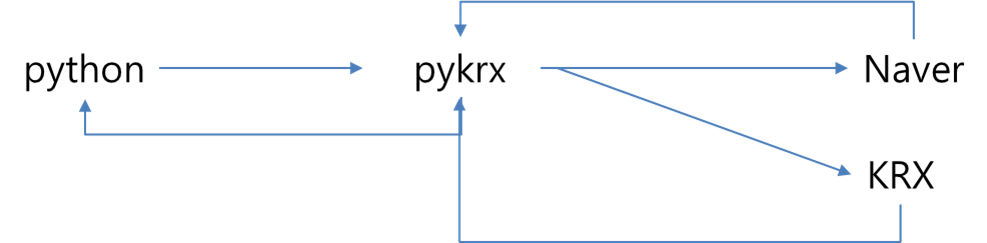

In [4]:
from pykrx import stock

tickers = stock.get_market_ticker_list("20210115")
len(tickers)
tickers

stock1 = stock.get_market_ticker_name("060310")
stock1


'3S'

In [5]:
df = stock.get_market_ohlcv_by_date("20210104", "20210108", "005930")
df.head(5)

#월별: m, 일별: d, 연도별: y
df = stock.get_market_ohlcv_by_date("20210104", "20210108", "005930", "d")	
df

df = stock.get_market_ohlcv_by_date("20201104", "20210108", "005930", "m")
df



시가     고가     저가     종가        거래량
날짜                                               
2020-11-30  58900  69500  57800  66700  460991347
2020-12-31  67100  81300  67100  81000  529998852
2021-01-31  81000  90000  80200  88800  207737907

In [6]:
df = stock.get_market_price_change_by_ticker("20210104", "20210115")
print(df.head(5))

df = stock.get_market_ohlcv_by_date("20210104", "20210115", "000020")
df

#KOSPI, KOSDAQ, KONEX 지원
df = stock.get_market_trading_volume_by_date("20210104", "20210115", "KOSPI")
print(df.head(5))

df = stock.get_market_trading_volume_by_date("20200101", "20210115", 'KOSPI', freq='m')
df

df = stock.get_market_trading_value_by_date("20210104", "20210115", "KOSPI")
df


            종목명      시가      종가   변동폭   등락률       거래량          거래대금
티커                                                                 
095570   AJ네트웍스    4615    4510  -105 -2.28   3982449   18726203680
006840    AK홀딩스   25150   26300  1150  4.57   1590631   41092351750
027410      BGF    4895    4830   -65 -1.33   4729036   23091599895
282330   BGF리테일  135500  145000  9500  7.01    809850  114155484750
138930  BNK금융지주    5680    5880   200  3.52  36350605  209410643490
                기관합계      기타법인        개인     외국인합계  전체
날짜                                                    
2021-01-04 -18241927  -2321155  13307925   7255157   0
2021-01-05   -282797 -20356879  21335001   -695325   0
2021-01-06 -28606702   1763197  19464237   7379268   0
2021-01-07  16803440  -4926713 -23957887  12081160   0
2021-01-08 -24886527   1334709   6228334  17323484   0


기관합계         기타법인             개인          외국인합계  전체
날짜                                                                      
2021-01-04 -1189876714363  69165156608  1031014166618    89697391137   0
2021-01-05  -536265643081  16098509714   728387733108  -208220599741   0
2021-01-06 -1369155503764  37370130195  1729261196142  -397475822573   0
2021-01-07  1033917002121  36342229807 -1183634539101   113375307173   0
2021-01-08 -1147931424901  63596153201  -559141825960  1643477097660   0
2021-01-11 -3743203896260 -31327947241  4492145003867  -717613160366   0
2021-01-12 -1723898682006  30388878033  2312445113552  -618935309579   0
2021-01-13  -372450411172   9868157834   169086090692   193496162646   0
2021-01-14 -1428981445508  38743362517   712730906649   677507176342   0
2021-01-15 -1414745885546  54444293672  2113924037705  -753622445831   0

In [7]:
df = stock.get_market_fundamental_by_ticker("20210115")
print(df.head(2))

df = stock.get_market_fundamental_by_date("20210104", "20210115", '005930')
print(df.head(2))

df = stock.get_market_fundamental_by_date("20201004", "20210115", "005930", "m")
print(df.head(2))


          BPS        PER       PBR   EPS       DIV  DPS
티커                                                     
095570   6802   4.589844  0.660156   982  6.648438  300
006840  62448  12.132812  0.419922  2168  2.849609  750
              BPS    PER   PBR   EPS   DIV   DPS
날짜                                              
2021-01-04  37528  26.22  2.21  3166  1.71  1416
2021-01-05  37528  26.50  2.24  3166  1.69  1416
              BPS    PER   PBR   EPS   DIV   DPS
날짜                                              
2020-10-31  37528  18.54  1.56  3166  2.41  1416
2020-11-30  37528  18.13  1.53  3166  2.47  1416
